In this notebook, I want to wrap up some loose ends from last time.

## The two cultures

This "debate" captures the tension between two approaches:

- modeling the underlying mechanism of a phenomena
- using machine learning to predict outputs (without necessarily understanding the mechanisms that create them)

<img src="https://github.com/fastai/course-nlp/blob/master/images/glutathione.jpg?raw=1" alt="One carbon cell metabolism" style="width: 80%"/>

I was part of a research project (in 2007) that involved manually coding each of the above reactions.  We were determining if the final system could generate the same ouputs (in this case, levels in the blood of various substrates) as were observed in clinical studies.  

The equation for each reaction could be quite complex:
<img src="https://github.com/fastai/course-nlp/blob/master/images/vcbs.png?raw=1" alt="reaction equation" style="width: 80%"/>

This is an example of modeling the underlying mechanism, and is very different from a machine learning approach.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2391141/

**my edit:** But these two processes are not mutually exclusive. We can have a method that mixes up the two my considering only SOME underlying mechanism.

## The most popular word in each state

<img src="https://github.com/fastai/course-nlp/blob/master/images/map-popular-word.png?raw=1" alt="The" style="width: 80%"/>

A time to remove stop words

**Stemming vs lemmatization**
Stemming is a poor mans lemmatizatin, meaning stemming is just chopping off ends of a word to find a probable root, and lemmatization is finding the actual root, which is an *actual* word.

Lemmatization is computationally expensive than stemming.

**When to do it?**

When you have less data you wanna stem/lematize.

Also when you think your model can handle the complexity of the language (like a neural net), you dont't really need to remove stop words or do stemming/lematization. But if your model is simpler and cant handle the complexity or learn as much as to realize these are stop words or same rooted words, maybe you neeed to remove stop words and perform stemming/lemmatization.

## Factorization is analgous to matrix decomposition

### With Integers

Multiplication: 
	$$2 * 2 * 3 * 3 * 2 * 2 \rightarrow 144$$
    
<img src="https://github.com/fastai/course-nlp/blob/master/images/factorization.png?raw=1" alt="factorization" style="width: 50%"/>

Factorization is the “opposite” of multiplication: 
	 $$144 \rightarrow 2 * 2 * 3 * 3 * 2 * 2$$
     
Here, the factors have the nice property of being prime.

Prime factorization is much harder than multiplication (which is good, because it’s the heart of encryption).

### With Matrices

Matrix decompositions are a way of taking matrices apart (the "opposite" of matrix multiplication).

Similarly, we use matrix decompositions to come up with matrices with nice properties.

Taking matrices apart is harder than putting them together.

[One application](https://github.com/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb):

<img src="https://github.com/fastai/course-nlp/blob/master/images/grid1.jpg?raw=1" alt="The" style="width: 100%"/>

What are the nice properties that matrices in an SVD decomposition have?

$$A = USV$$

- orthanormal along the topic column (column wise and row wise)
- the middle matrix s is a diagonal matrix. it has singular values, ordered in descending order. They represent importance.
- V has the same properties as U, except in transposed positioning.

## Some Linear Algebra Review

### Matrix-vector multiplication

$Ax = b$ takes a linear combination of the columns of $A$, using coefficients $x$

http://matrixmultiplication.xyz/

<img src="https://github.com/nlp-club/aisha_khatun_nlp_club/blob/master/fast.ai%20NLP%20course/Screenshot%20from%202019-07-26%2011-20-35.png?raw=1" alt="NMF on faces" style="width: 80%"/>

### Matrix-matrix multiplication

$A B = C$ each column of C is a linear combination of columns of A, where the coefficients come from the corresponding column of C

<img src="https://github.com/fastai/course-nlp/blob/master/images/face_nmf.png?raw=1" alt="NMF on faces" style="width: 80%"/>

(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

### Matrices as Transformations

The 3Blue 1Brown [Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos are fantastic.  They give a much more visual & geometric perspective on linear algreba than how it is typically taught.  These videos are a great resource if you are a linear algebra beginner, or feel uncomfortable or rusty with the material.

Even if you are a linear algrebra pro, I still recommend these videos for a new perspective, and they are very well made.

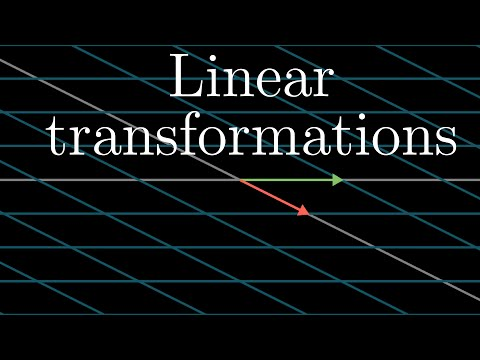

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("kYB8IZa5AuE")

- how does this relate to NMF? we should watch some ''basis changing'' videos.

- why do we call it transformation, and not function (which are actally the same thing!)
- because transformation is related to movement, we want to think in terms of vector movements.
- for the tranformation to be linear, it has to follow two properties:
  - all lines have to remain lines
  - the origin has to remain fixed
- that means mainly " Grid lines reamin parallel and evenly spaced ".
- we can find any transformed vector from where the i and j vectors landed.
- the i and j vectors can be combined together to form a 2x2 matrix. its a transformation matrix.
- i and j are basis vectors.
- that matrix has columns i and j. so xi+yj = v , the required vector
- now that can be actually called, "matrix multiplication". comma=column -> [x,y][i, j] => [x,y][a b , c d]

## British Literature SVD & NMF in Excel

Data was downloaded from [here](https://de.dariah.eu/tatom/datasets.html)

The code below was used to create the matrices which are displayed in the SVD and NMF of British Literature excel workbook. The data is intended to be viewed in Excel, I've just included the code here for thoroughness.

### Initializing, create document-term matrix

In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition
from glob import glob
import os

In [0]:
np.set_printoptions(suppress=True)

In [0]:
filenames = []
for folder in ["british-fiction-corpus"]: #, "french-plays", "hugo-les-misérables"]:
    filenames.extend(glob("data/literature/" + folder + "/*.txt"))

In [0]:
len(filenames)

27

In [0]:
vectorizer = TfidfVectorizer(input='filename', stop_words='english')
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

((27, 55035), 55035)

In [0]:
[f.split("/")[3] for f in filenames]

['Sterne_Tristram.txt',
 'Austen_Pride.txt',
 'Thackeray_Pendennis.txt',
 'ABronte_Agnes.txt',
 'Austen_Sense.txt',
 'Thackeray_Vanity.txt',
 'Trollope_Barchester.txt',
 'Fielding_Tom.txt',
 'Dickens_Bleak.txt',
 'Eliot_Mill.txt',
 'EBronte_Wuthering.txt',
 'Eliot_Middlemarch.txt',
 'Fielding_Joseph.txt',
 'ABronte_Tenant.txt',
 'Austen_Emma.txt',
 'Trollope_Prime.txt',
 'CBronte_Villette.txt',
 'CBronte_Jane.txt',
 'Richardson_Clarissa.txt',
 'CBronte_Professor.txt',
 'Dickens_Hard.txt',
 'Eliot_Adam.txt',
 'Dickens_David.txt',
 'Trollope_Phineas.txt',
 'Richardson_Pamela.txt',
 'Sterne_Sentimental.txt',
 'Thackeray_Barry.txt']

### NMF

In [0]:
clf = decomposition.NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(dtm)
H1 = clf.components_

In [0]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [0]:
def get_all_topic_words(H):
    top_indices = lambda t: {i for i in np.argsort(t)[:-num_top_words-1:-1]}
    topic_indices = [top_indices(t) for t in H]
    return sorted(set.union(*topic_indices))

In [0]:
ind = get_all_topic_words(H1)

In [0]:
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'brandon', 'catherine', 'cathy',
       'corporal', 'crawley', 'darcy', 'dashwood', 'did', 'earnshaw',
       'edgar', 'elinor', 'emma', 'father', 'ferrars', 'finn', 'glegg',
       'good', 'gradgrind', 'hareton', 'heathcliff', 'jennings', 'jones',
       'joseph', 'know', 'lady', 'laura', 'like', 'linton', 'little', 'll',
       'lopez', 'louisa', 'lyndon', 'maggie', 'man', 'marianne', 'miss',
       'mr', 'mrs', 'old', 'osborne', 'pendennis', 'philip', 'phineas',
       'quoth', 'said', 'sissy', 'sophia', 'sparsit', 'stephen', 'thought',
       'time', 'tis', 'toby', 'tom', 'trim', 'tulliver', 'uncle', 'wakem',
       'wharton', 'willoughby'], 
      dtype='<U31')

In [0]:
show_topics(H1)

['mr said mrs miss emma darcy little know',
 'said little like did time know thought good',
 'adams jones said lady allworthy sophia joseph mr',
 'elinor marianne dashwood jennings willoughby mrs brandon ferrars',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'toby said uncle father corporal quoth tis trim',
 'phineas said mr lopez finn man wharton laura',
 'said crawley lyndon pendennis old little osborne lady',
 'bounderby gradgrind sparsit said mr sissy louisa stephen']

In [0]:
W1.shape, H1[:, ind].shape

((27, 10), (10, 64))

#### Export to CSVs

In [0]:
from IPython.display import FileLink, FileLinks

In [0]:
np.savetxt("britlit_W.csv", W1, delimiter=",", fmt='%.14f')
FileLink('britlit_W.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_W.csv

In [0]:
np.savetxt("britlit_H.csv", H1[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_H.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_H.csv

In [0]:
np.savetxt("britlit_raw.csv", dtm[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_raw.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_raw.csv

In [0]:
[str(word) for word in vocab[ind]]

['adams',
 'allworthy',
 'bounderby',
 'brandon',
 'catherine',
 'cathy',
 'corporal',
 'crawley',
 'darcy',
 'dashwood',
 'did',
 'earnshaw',
 'edgar',
 'elinor',
 'emma',
 'father',
 'ferrars',
 'finn',
 'glegg',
 'good',
 'gradgrind',
 'hareton',
 'heathcliff',
 'jennings',
 'jones',
 'joseph',
 'know',
 'lady',
 'laura',
 'like',
 'linton',
 'little',
 'll',
 'lopez',
 'louisa',
 'lyndon',
 'maggie',
 'man',
 'marianne',
 'miss',
 'mr',
 'mrs',
 'old',
 'osborne',
 'pendennis',
 'philip',
 'phineas',
 'quoth',
 'said',
 'sissy',
 'sophia',
 'sparsit',
 'stephen',
 'thought',
 'time',
 'tis',
 'toby',
 'tom',
 'trim',
 'tulliver',
 'uncle',
 'wakem',
 'wharton',
 'willoughby']

### SVD

In [0]:
U, s, V = decomposition.randomized_svd(dtm, 10)

In [0]:
ind = get_all_topic_words(V)

In [0]:
len(ind)

52

In [0]:
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'bretton', 'catherine',
       'crimsworth', 'darcy', 'dashwood', 'did', 'elinor', 'elton', 'emma',
       'finn', 'fleur', 'glegg', 'good', 'gradgrind', 'hareton', 'hath',
       'heathcliff', 'hunsden', 'jennings', 'jones', 'joseph', 'knightley',
       'know', 'lady', 'linton', 'little', 'lopez', 'louisa', 'lydgate',
       'madame', 'maggie', 'man', 'marianne', 'miss', 'monsieur', 'mr',
       'mrs', 'pelet', 'philip', 'phineas', 'said', 'sissy', 'sophia',
       'sparsit', 'toby', 'tom', 'tulliver', 'uncle', 'weston'], 
      dtype='<U31')

In [0]:
show_topics(H1)

['mr said mrs miss emma darcy little know',
 'said little like did time know thought good',
 'adams jones said lady allworthy sophia joseph mr',
 'elinor marianne dashwood jennings willoughby mrs brandon ferrars',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'toby said uncle father corporal quoth tis trim',
 'phineas said mr lopez finn man wharton laura',
 'said crawley lyndon pendennis old little osborne lady',
 'bounderby gradgrind sparsit said mr sissy louisa stephen']

In [0]:
np.savetxt("britlit_U.csv", U, delimiter=",", fmt='%.14f')
FileLink('britlit_U.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_U.csv

In [0]:
np.savetxt("britlit_V.csv", V[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_V.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_V.csv

In [0]:
np.savetxt("britlit_raw_svd.csv", dtm[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_raw_svd.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_raw_svd.csv

In [0]:
np.savetxt("britlit_S.csv", np.diag(s), delimiter=",", fmt='%.14f')
FileLink('britlit_S.csv')

/data/jhoward/rachel/num-lin-alg/nbs/britlit_S.csv

In [0]:
[str(word) for word in vocab[ind]]

['adams',
 'allworthy',
 'bounderby',
 'bretton',
 'catherine',
 'crimsworth',
 'darcy',
 'dashwood',
 'did',
 'elinor',
 'elton',
 'emma',
 'finn',
 'fleur',
 'glegg',
 'good',
 'gradgrind',
 'hareton',
 'hath',
 'heathcliff',
 'hunsden',
 'jennings',
 'jones',
 'joseph',
 'knightley',
 'know',
 'lady',
 'linton',
 'little',
 'lopez',
 'louisa',
 'lydgate',
 'madame',
 'maggie',
 'man',
 'marianne',
 'miss',
 'monsieur',
 'mr',
 'mrs',
 'pelet',
 'philip',
 'phineas',
 'said',
 'sissy',
 'sophia',
 'sparsit',
 'toby',
 'tom',
 'tulliver',
 'uncle',
 'weston']

## Randomized SVD offers a speed up

<img src="https://github.com/fastai/course-nlp/blob/master/images/svd_slow.png?raw=1" alt="" style="width: 80%"/>

One way to address this is to use randomized SVD.  In the below chart, the error is the difference between A - U * S * V, that is, what you've failed to capture in your decomposition:

<img src="https://github.com/fastai/course-nlp/blob/master/images/svd_speed.png?raw=1" alt="" style="width: 60%"/>

For more on randomized SVD, check out my [PyBay 2017 talk](https://www.youtube.com/watch?v=7i6kBz1kZ-A&list=PLtmWHNX-gukLQlMvtRJ19s7-8MrnRV6h6&index=7).

For significantly more on randomized SVD, check out the [Computational Linear Algebra course](https://github.com/fastai/numerical-linear-algebra).

## Full vs Reduced SVD

Remember how we were calling `np.linalg.svd(vectors, full_matrices=False)`?  We set `full_matrices=False` to calculate the reduced SVD.  For the full SVD, both U and V are **square** matrices, where the extra columns in U form an orthonormal basis (but zero out when multiplied by extra rows of zeros in S).

Diagrams from Trefethen:

<img src="https://github.com/fastai/course-nlp/blob/master/images/full_svd.JPG?raw=1" alt="" style="width: 80%"/>

<img src="https://github.com/fastai/course-nlp/blob/master/images/reduced_svd.JPG?raw=1" alt="" style="width: 70%"/>